In [1]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



TestImage_Path = 'Test_Image/'

origin_panda = cv2.imread(TestImage_Path+'panda.jpg')
origin_bird = cv2.imread(TestImage_Path+'QuteBird.jpg')
origin_self_1 = cv2.cvtColor(cv2.imread(TestImage_Path+'self_1.jpg'),cv2.COLOR_BGR2RGB)
origin_tree = cv2.cvtColor(cv2.imread(TestImage_Path+'tree.jpg'),cv2.COLOR_BGR2RGB)
origin_lenna = cv2.cvtColor(cv2.imread(TestImage_Path+'Lenna.png'),cv2.COLOR_BGR2RGB)

origin_howon = cv2.cvtColor(cv2.imread(TestImage_Path+'howon.jpg'),cv2.COLOR_BGR2RGB)
origin_minho = cv2.cvtColor(cv2.imread(TestImage_Path+'minho.jpg'),cv2.COLOR_BGR2RGB)
origin_minho_jisu = cv2.cvtColor(cv2.imread(TestImage_Path+'minho_jisu.jpg'),cv2.COLOR_BGR2RGB)
origin_Character_1 = cv2.cvtColor(cv2.imread(TestImage_Path+'Character.jpg'),cv2.COLOR_BGR2RGB)

origin_sns_post = cv2.cvtColor(cv2.imread(TestImage_Path+'cat_1.jpg'),cv2.COLOR_BGR2RGB)



In [2]:
# # 역투영


# win_name = 'back_projection'
# img = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# draw = img.copy()




# #--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수


# def masking(bp, win_name):
#     disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#     cv2.filter2D(bp,-1,disc,bp)
#     _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
#     result = cv2.bitwise_and(img, img, mask=mask)
#     cv2.imshow(win_name, result)

    
    
    
    
    
# #--⑥ 직접 구현한 역투영 함수
# def backProject_manual(hist_roi):
#     #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
#     hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
#     #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
#     hist_rate = hist_roi/ (hist_img + 1)
#     #--⑨ 비율에 맞는 픽셀 값 매핑
#     h,s,v = cv2.split(hsv_img)
#     bp = hist_rate[h.ravel(), s.ravel()]
#     # 비율은 1을 넘어서는 안되기 때문에 1을 넘는 수는 1을 갖게 함
#     bp = np.minimum(bp, 1)
#     # 1차원 배열을 원래의 shape로 변환
#     bp = bp.reshape(hsv_img.shape[:2])
#     cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
#     bp = bp.astype(np.uint8)
#     #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    
    
    
    
    
#     masking(bp,'result_manual')
 
# # OpenCV API로 구현한 함수 ---⑪ 
# def backProject_cv(hist_roi):
#     # 역투영 함수 호출 ---⑫
#     bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
#     # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
#     masking(bp,'result_cv')
    
    
    
    
    
    

# # ROI 선택 ---①
# (x,y,w,h) = cv2.selectROI(win_name, img, False)
# if w > 0 and h > 0:
#     roi = draw[y:y+h, x:x+w]
#     # 빨간 사각형으로 ROI 영역 표시
#     cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
#     #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
#     hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
#     #--③ H,S 채널에 대한 히스토그램 계산
#     hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
#     #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
#     backProject_manual(hist_roi)
#     backProject_cv(hist_roi)
# cv2.imshow(win_name, draw)
# cv2.waitKey()
# cv2.destroyAllWindows()




In [3]:
# 색체널 분리



def Color_channel(img,color_range=60,brightness_range = (0,255),chroma_range = (0,255)):
    
    
    # color_range max = 60 색의 범위를 결정할 숫자
    # brightness_range = (0,255) 명도
    # chroma_range = (0,255) 채도


    red_lower = np.array([0-(color_range/2),chroma_range[0],brightness_range[0]])
    red_upper = np.array([0+(color_range/2),chroma_range[1],brightness_range[1]])
    green_lower = np.array([60-(color_range/2),chroma_range[0],brightness_range[0]])
    green_upper = np.array([60+(color_range/2),chroma_range[1],brightness_range[1]])
    blue_lower = np.array([120-(color_range/2),chroma_range[0],brightness_range[0]])
    blue_upper = np.array([120+(color_range/2),chroma_range[1],brightness_range[1]])
    
    
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    red_mask = cv2.inRange(hsv,red_lower,red_upper)
    green_mask = cv2.inRange(hsv,green_lower,green_upper)
    blue_mask = cv2.inRange(hsv,blue_lower,blue_upper)
    
    red = cv2.bitwise_and(img,img,mask=red_mask)
    green = cv2.bitwise_and(img,img, mask = green_mask)
    blue = cv2.bitwise_and(img,img,mask = blue_mask)
    
    return red, green, blue

def makeHist(img):
    h,s,v = cv2.split(img)
    f,ax = plt.subplots(2,3)
    f.set_size_inches(15,7)
    ax[0,0].imshow(h)
    ax[0,1].imshow(s)
    ax[0,2].imshow(v)


    hist_h = cv2.calcHist(img,[0],None,[256],[0,256])
    hist_s = cv2.calcHist(img,[1],None,[256],[0,256])
    hist_v = cv2.calcHist(img,[2],None,[256],[0,256])


    ax[1,0].plot(hist_h)
    ax[1,1].plot(hist_s)
    ax[1,2].plot(hist_v)

    
def make_V(img):
    h,s,v = cv2.split(img)
    f,ax = plt.subplots(2,1)
    f.set_size_inches(15,7)

    ax[0].imshow(v)
    hist_v = cv2.calcHist(img,[2],None,[256],[0,256])
    ax[1].plot(hist_v)

def hsv_equalizeHist(img):

    panda_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    panda_hsv[:, :, 0] = cv2.equalizeHist(panda_hsv[:, :, 0])
    panda_hsv[:, :, 1] = cv2.equalizeHist(panda_hsv[:, :, 1])
    panda_hsv[:, :, 2] = cv2.equalizeHist(panda_hsv[:, :, 2])
    return cv2.cvtColor(img,cv2.COLOR_HLS2BGR)


def equalizeHist(img):

    panda_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    panda_hsv[:, :, 0] = cv2.equalizeHist(panda_hsv[:, :, 0])
    return cv2.cvtColor(img,cv2.COLOR_HLS2BGR)


# def GaussianBlur(img,ksize):
#     blur = cv2.GaussianBlur(img,ksize=(ksize,ksize),sigmaX=0)
#     edged  = cv2.Canny(blur,10,250)
#     return edged



# def gaussian_closed(img,gaussian_val=1,kernel_val=5):

#     gaussian = GaussianBlur(img,1)
#     edged = cv2.Canny(gaussian, 10, 250)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_val,kernel_val))
#     closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
#     return   gaussian , closed


def canny_closed(img,th_1 = 100,th_2 =250,kernel_val=5):

    edged = cv2.Canny(img, th_1, th_2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_val,kernel_val))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    return   edged , closed


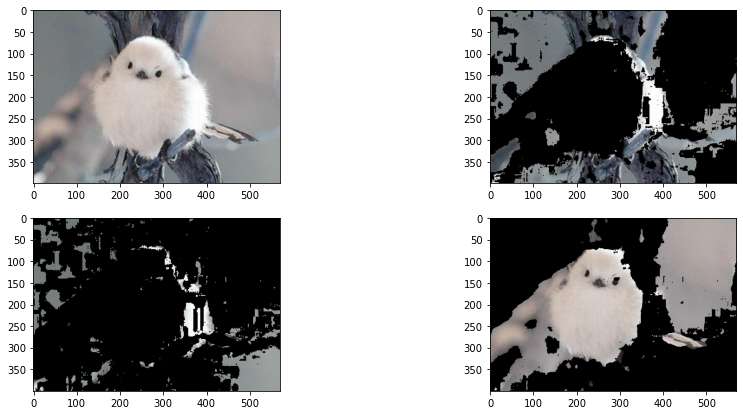

In [48]:
f,ax = plt.subplots(2,2)
f.set_size_inches(15,7)



origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
hsv = Color_channel(origin)


ax[0,0].imshow(origin)
ax[0,1].imshow(hsv[0])
ax[1,0].imshow(hsv[1])
ax[1,1].imshow(hsv[2])

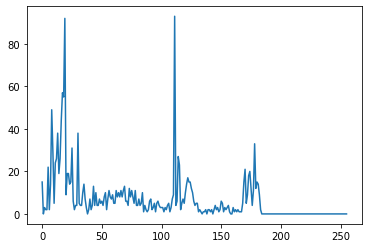

In [8]:
bird_hsv = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg'), cv2.COLOR_BGR2HSV)


h,s,v = cv2.split(bird_hsv)


hist_h = cv2.calcHist(bird_hsv,[0],None,[256],[0,256])
hist_s = cv2.calcHist(bird_hsv,[1],None,[256],[0,256])
hist_v = cv2.calcHist(bird_hsv,[2],None,[256],[0,256])

# makeHist(bird_hsv)



plt.plot(hist_h)


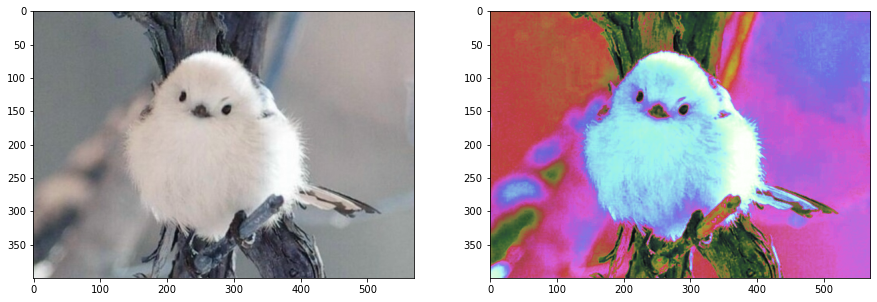

In [11]:
f,ax = plt.subplots(1,2)
f.set_size_inches(15,7)
ax[0].imshow(origin_bird)
ax[1].imshow(hsv_equalizeHist(origin_bird))


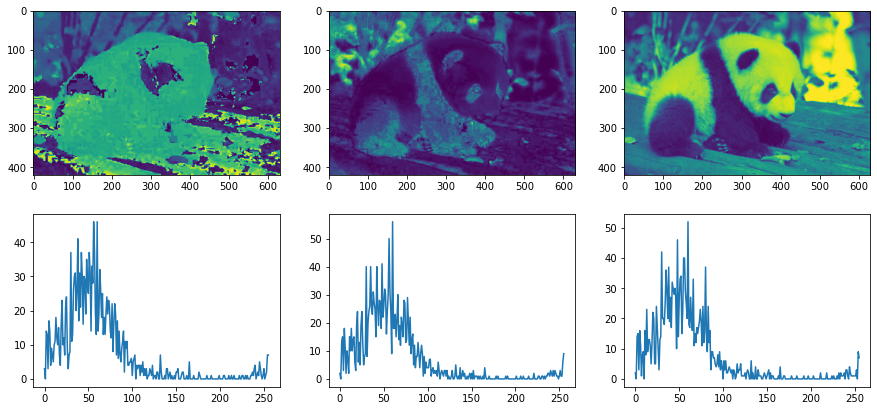

In [17]:
panda_hsv = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg'), cv2.COLOR_BGR2HSV)

makeHist(panda_hsv)

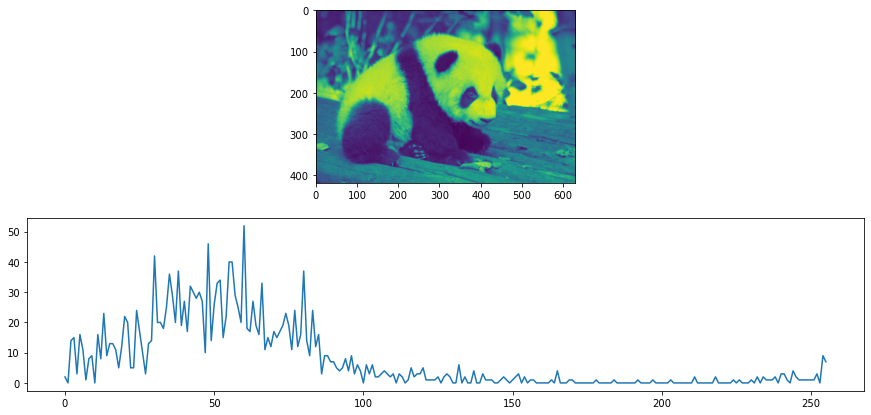

In [60]:
make_V(panda_hsv)



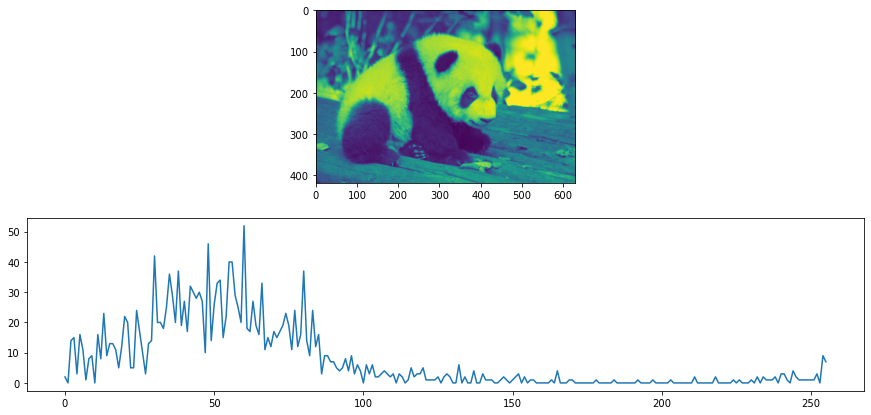

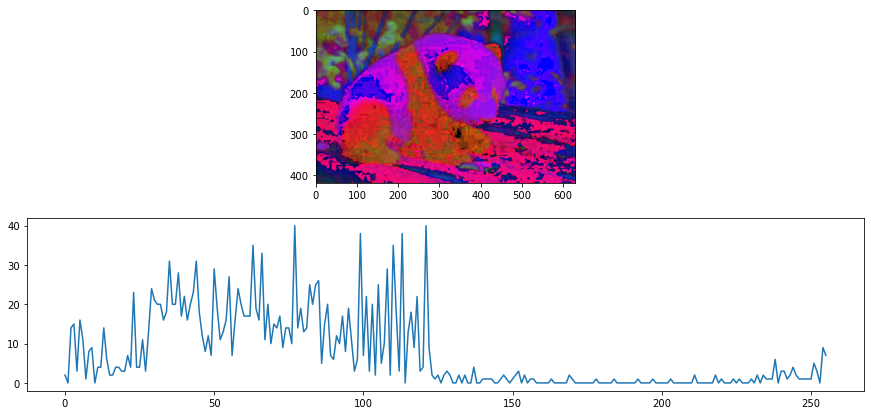

In [64]:
panda_hsv = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg'), cv2.COLOR_BGR2HSV)


make_V(panda_hsv)

# h,s,v = cv2.split(panda_hsv)
# f,ax = plt.subplots(2,1)
# f.set_size_inches(15,7)
# ax[0].imshow(v)
# hist_v = cv2.calcHist(img,[2],None,[256],[0,256])
# ax[1].plot(hist_v)

panda_hsv[:, :, 0] = cv2.equalizeHist(panda_hsv[:, :, 0])

f,ax = plt.subplots(2,1)
f.set_size_inches(15,7)
ax[0].imshow(panda_hsv)
hist_v = cv2.calcHist(panda_hsv,[2],None,[256],[0,256])
ax[1].plot(hist_v)


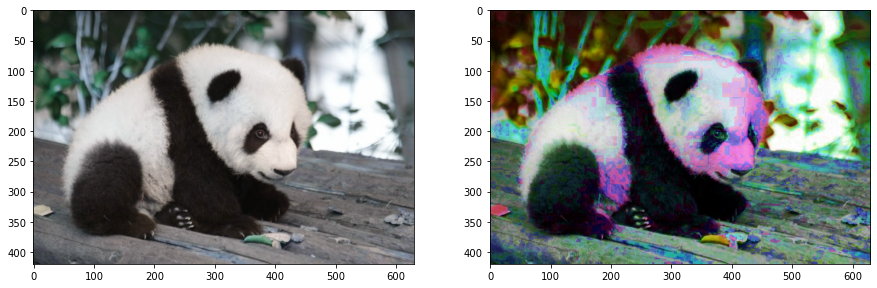

In [124]:

origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
panda_hsv = cv2.cvtColor(origin, cv2.COLOR_BGR2HSV)
panda_hsv[:, :, 0] = cv2.equalizeHist(panda_hsv[:, :, 0])
panda_hsv[:, :, 1] = cv2.equalizeHist(panda_hsv[:, :, 1])
panda_hsv[:, :, 2] = cv2.equalizeHist(panda_hsv[:, :, 2])
f,ax = plt.subplots(1,2)
f.set_size_inches(15,7)
ax[0].imshow(origin)
ax[1].imshow(cv2.cvtColor(panda_hsv,cv2.COLOR_HSV2BGR))



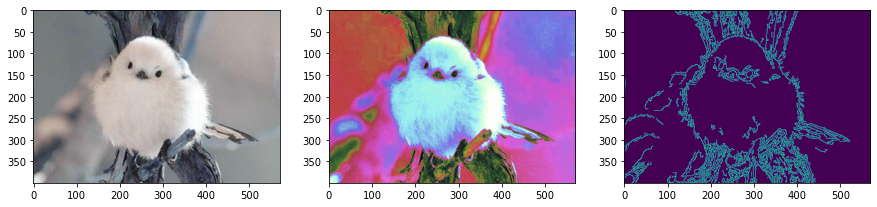

In [6]:

origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
origin_HE = hsv_equalizeHist(origin)
f,ax = plt.subplots(1,3)
f.set_size_inches(15,15)
ax[0].imshow(origin)
ax[1].imshow(origin_HE)
ax[2].imshow(canny_closed(origin_HE)[0])

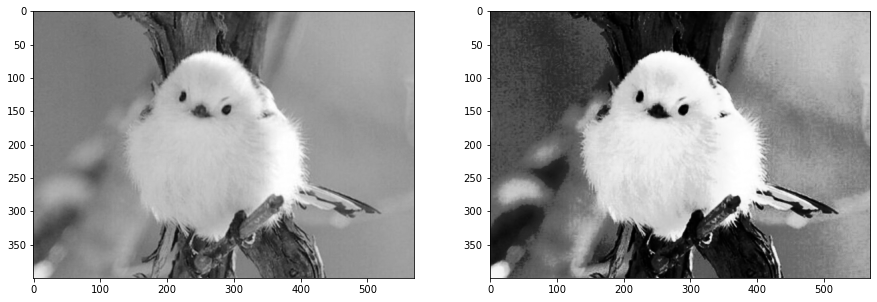

In [13]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
gray = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
gray_equalizeHist = cv2.equalizeHist(gray)

f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(gray_equalizeHist,cmap='gray')



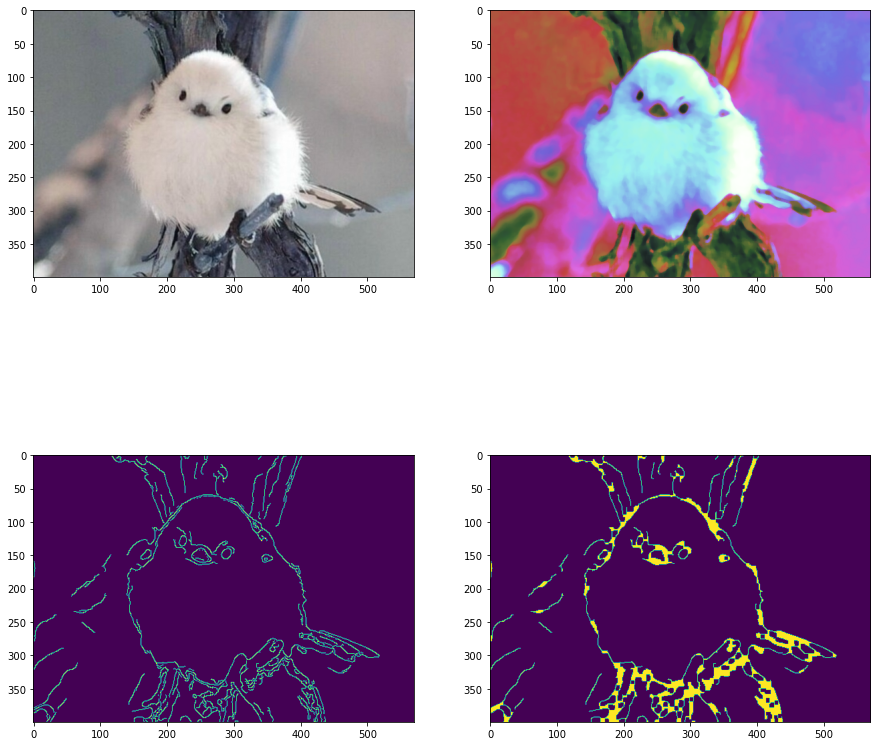

In [187]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
origin_HE = hsv_equalizeHist(origin)
HE_me = cv2.medianBlur(origin_HE,7)
cny, clo = canny_closed(HE_me,kernel_val=5)
f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(origin)
ax[0,1].imshow(HE_me)
ax[1,0].imshow(cny)
ax[1,1].imshow(clo)


In [218]:

origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
origin_HE = hsv_equalizeHist(origin)
bilateral = cv2.bilateralFilter(origin_HE,40,80,80)
gau, clo = canny_closed(bilateral,th_1=60,th_2=200,kernel_val=5)
f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(origin)
ax[0,1].imshow(bilateral)
ax[1,0].imshow(gau)
ax[1,1].imshow(clo)

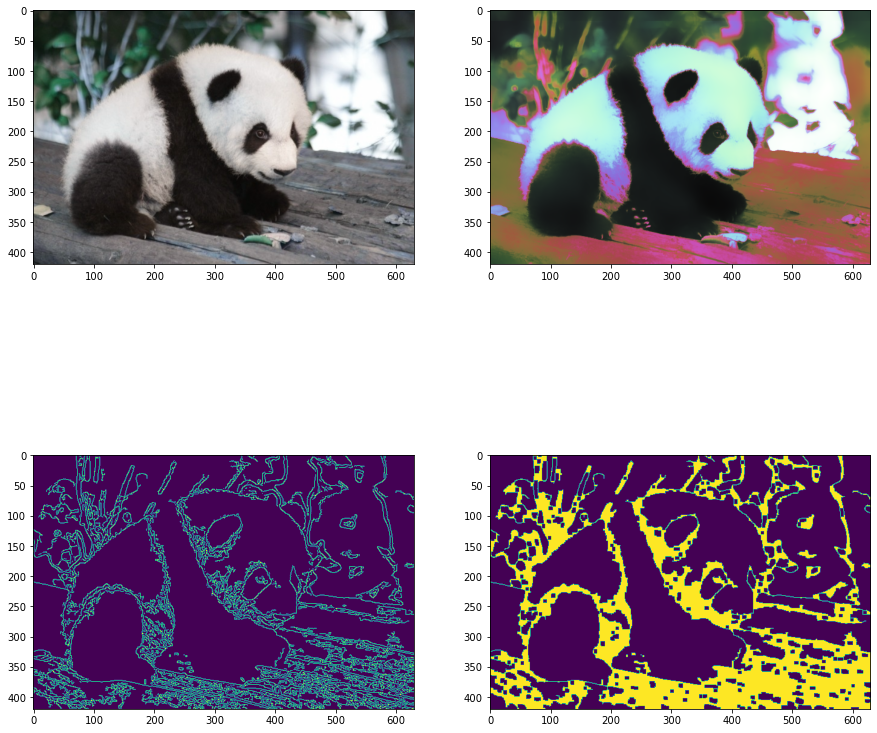

In [206]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
origin_HE = hsv_equalizeHist(origin)
bilateral = cv2.bilateralFilter(origin_HE,40,80,80)
cny, clo = canny_closed(bilateral,th_2=0,kernel_val=5)
f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(origin)
ax[0,1].imshow(bilateral)
ax[1,0].imshow(cny)
ax[1,1].imshow(clo)

## Canny 문제점
- Canny는 고주파를 고려하지 않음
    - Canny는 색의 편차가 커질때 경계선을 생성한다.
    - 고주파 영역에는 굉장히 많은 경계선이 발생한다.
    

- Canny는 원본색에 대한 정보를 포함하지 않음
    - 생성된 경계선지도는 원본색에 대한 정보가 소실된다
    
    
- 결과적으로 다양한색이 존제하는 고주파 영역에서는 객채구분이 불가능함
    -  cv2.getStructuringElement ,cv2.morphologyEx 함수로 고주파영역을 매끄럽게 만들때에 이러한 문제점을 가진 부분이 있을경우 
    그러한 부분에서는 객체구분이 불가능해짐

### 예시
밑에 그림은 아주 좋은예시다. 원본사진의 오른쪽 중단을 보면 건물과 사람의 등이있다. 

해당부분도 가우시안필터를 사용하기 전까지는 구분이 뚜렷하게 되고있으나 가우시안 필터를 사용하고 굉장한 고주파영역를 보여준다.
그나마 여기과정까지는 사람이 원본이미지와 대조해보면 어디가 사람이고 건물인지 구분이 가능한 수준이다.

하지만 가우시안필터를 부드럽게 바꾸면 아예 건물하고 사람하고 구분하기위한 선자체가 다른 선들과 합쳐져 버린다.


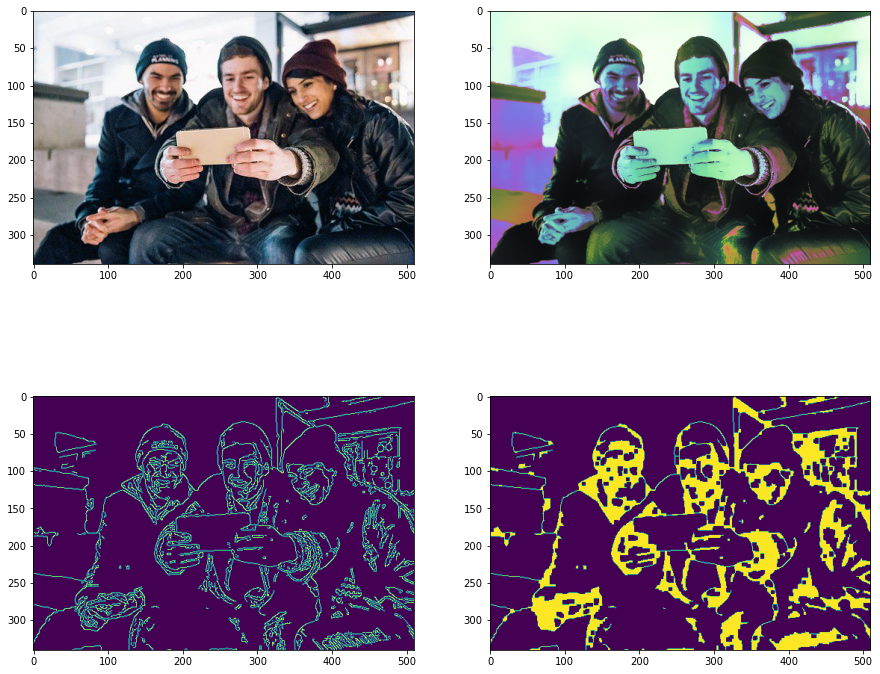

In [208]:


# origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg')
origin = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg'),cv2.COLOR_BGR2RGB)

origin_HE = hsv_equalizeHist(origin)
bilateral = cv2.bilateralFilter(origin_HE,40,80,80)
cny, clo = canny_closed(bilateral,kernel_val=5,th_2=200)
f,ax = plt.subplots(2,2)
f.set_size_inches(15,13)
ax[0,0].imshow(origin)
ax[0,1].imshow(bilateral)
ax[1,0].imshow(cny)
ax[1,1].imshow(clo)

In [59]:
temp = panda_hsv.copy()
temp_v = temp[:,:,0]
temp_v = temp_v.reshape(420*630)


np.std(temp_v)

49.416244160627976

### 해야할일:
- 히스토그램에서 꺾이는 점 찾기: 색을 범주화시키기

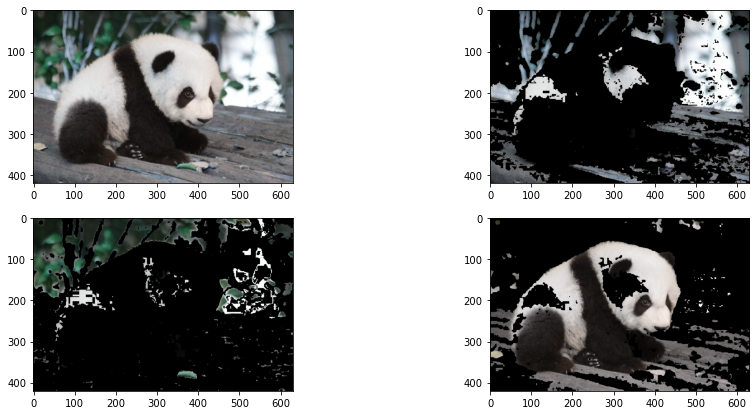

In [59]:

f,ax = plt.subplots(2,2)
f.set_size_inches(15,7)



origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
hsv = Color_channel(origin)


ax[0,0].imshow(origin)
ax[0,1].imshow(hsv[0])
ax[1,0].imshow(hsv[1])
ax[1,1].imshow(hsv[2])

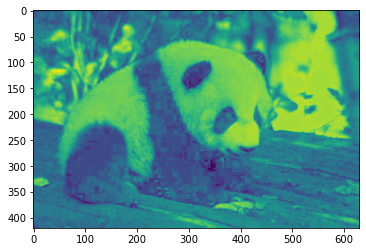

In [67]:
panda_hsv = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg'), cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(panda_hsv)
plt.imshow((s/2)+(v/2))

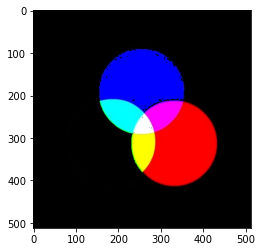

In [58]:
plt.imshow(cv2.bitwise_or(hsv[0],hsv[2]))

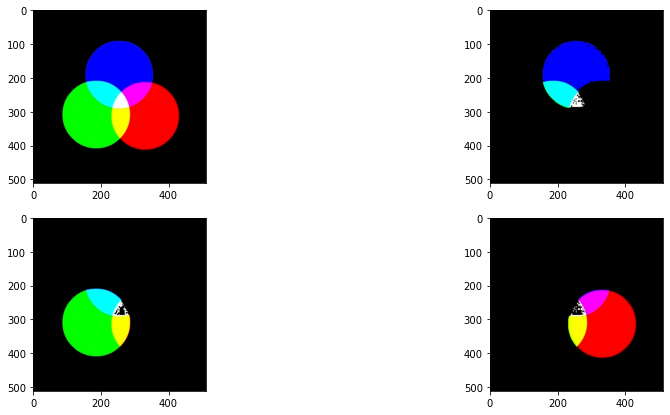

In [52]:
f,ax = plt.subplots(2,2)
f.set_size_inches(15,7)



origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/RGB.jpg')
hsv = Color_channel(origin,110)


ax[0,0].imshow(origin)
ax[0,1].imshow(hsv[0])
ax[1,0].imshow(hsv[1])
ax[1,1].imshow(hsv[2])

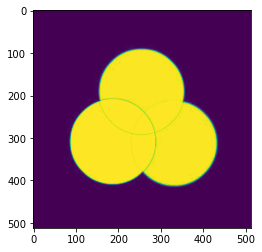

In [4]:
color_hsv = cv2.cvtColor(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/RGB.jpg'), cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(color_hsv)
plt.imshow(v)

### 이동 평균 필터

In [87]:

def PyrMeanShiftFiltering(img,sp=9,sr=20,lv=2,permission=False):
    if sp < 10:
        return cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    elif permission:
        return cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    else:
        pass




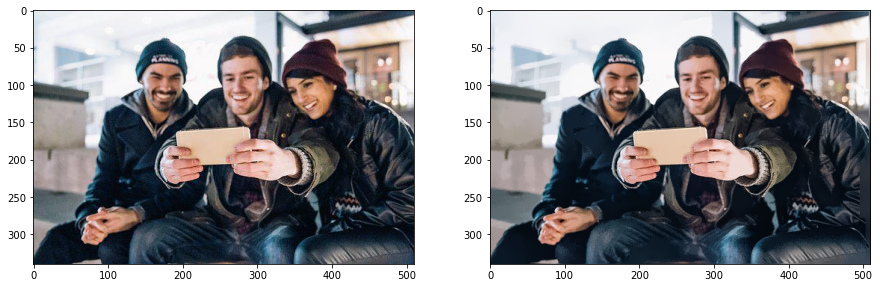

In [92]:
origin = origin_self_1.copy()

f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(origin)
ax[1].imshow(PyrMeanShiftFiltering(origin,sp=11,lv=4,sr=10,permission=True))


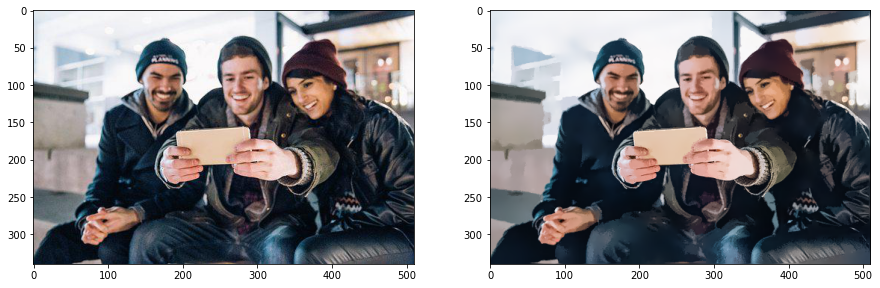

In [53]:
bird_img = Image.open(TestImage_Path+'self_1.jpg')

img_ary = np.array(bird_img)

f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(img_ary)
ax[1].imshow(PyrMeanShiftFiltering(img_ary))

In [42]:
print(type(origin))
print(type(bird_img))

<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [50]:
np.array(bird_img)

numpy.ndarray

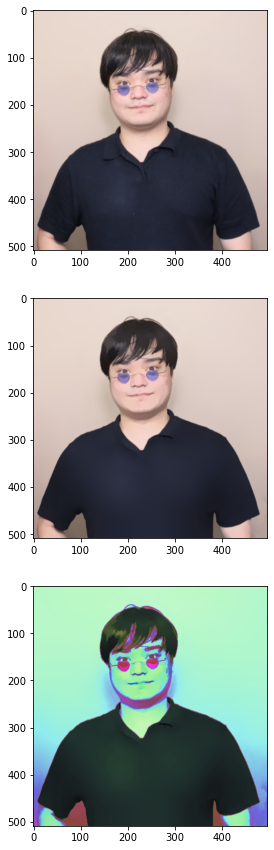

In [31]:
origin = origin_howon
temp = onChange(origin,lv=4)
origin_HE = hsv_equalizeHist(temp)
f,ax = plt.subplots(3,1)
f.set_size_inches(20,15)
ax[0].imshow(origin)
ax[1].imshow(temp)
ax[2].imshow(origin_HE)
